In [2]:
import numpy as np
import matplotlib.pyplot as plt

## 3.1.2 Exercises

### Question 2

$$
S_1 = \sum_{n=1}^{2N} (-1)^n \frac{n}{n+1}, \\
S_2 = - \sum_{n=1}^N \frac{2n-1}{2n} + \sum_{n=1}^N \frac{2n}{2n+1}, \\
S_3 = \sum_{n=1}^N \frac{1}{2n (2n+1)}
$$

In [46]:
@np.vectorize
def series1(N):
    total = 0
    for n in range(1, 2*N+1):
        total += (-1)**n * n / (n + 1)
    return total

@np.vectorize
def series2(N):
    total1 = 0
    total2 = 0
    for n in range(1, N+1):
        total1 += (2*n-1) / (2*n)
        total2 += (2*n) / (2*n+1)
    return total2 - total1

@np.vectorize
def series3(N):
    total = 0
    for n in range(1, N+1):
        total += 1 / (2*n*(2*n+1))
    return total


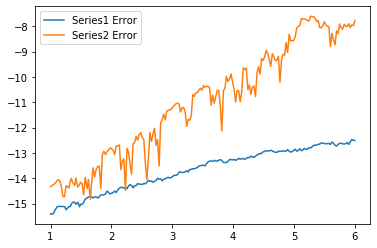

In [47]:
x = (10**np.linspace(1, 6, 200)).astype(int)
series1_res, series2_res, series3_res = series1(x), series2(x), series3(x)

error1 = (series1_res - series3_res) / series3_res
error2 = (series2_res - series3_res) / series3_res

plt.plot(np.log10(x), np.log10(np.abs(error1)), label='Series1 Error')
plt.plot(np.log10(x), np.log10(np.abs(error2)), label='Series2 Error')
plt.legend()

### Question 3

In [53]:
@np.vectorize
def series1(N):
    total = 0
    for n in range(1, N+1):
        total += 1/n
    return total

@np.vectorize
def series2(N):
    total = 0
    for n in range(N, 0, -1):
        total += 1/n
    return total

In [61]:
x = np.arange(500, 1000)
series1_res = series1(x)
series2_res = series2(x)

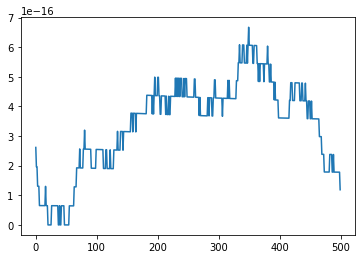

In [63]:
plt.plot(np.abs(series1_res - series2_res) / (np.abs(series1_res) + np.abs(series2_res)))

In [64]:
@np.vectorize
def sin_series(x, N):
    item = x
    total = 0
    for n in range(1, N+1):
        total += item
        item *= - x**2 / (2*n*(2*n+1))
    return total

$$
\sin x = \sum_{n=1}^\infty \frac{(-1)^{n-1} x^{2n-1}}{(2n-1)!} \simeq \sum_{n=1}^N \frac{(-1)^{n-1} x^{2n-1}}{(2n-1)!} \pm \frac{x^{2N}}{(2N)!}
$$

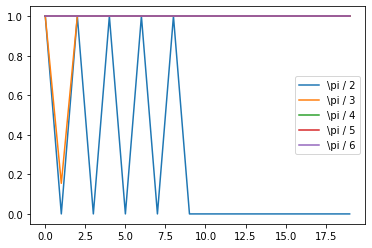

In [79]:
for k in range(2, 7):
    N = np.arange(0, 20)
    estimated_values = sin_series(np.pi/k, N)
    true_value = np.sin(np.pi/k)
    errors = np.abs(estimated_values - true_value) / true_value
    plt.plot(N, errors, label=f'\pi / {str(k)}')
plt.legend()

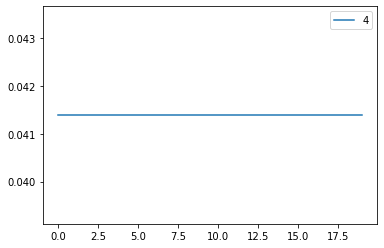

In [86]:
for k in range(4, 5):
    N = np.arange(0, 20)
    estimated_values = sin_series(np.pi/k, N)
    true_value = np.sin(np.pi/k)
    errors = np.log10(np.abs(estimated_values - true_value) / true_value + 0.1)
    plt.plot(N, errors, label=str(k))
plt.legend()